<a href="https://colab.research.google.com/github/specialak/Credit-Card-Fraud-Detection/blob/master/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                                                      Credit Card fraud Detection 
##                                                              19 dec 2018

In [0]:
!pip install -U -q pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
dataset_link = "101Bx7VRw4Q3XVO1T91eNTeUcvD5dDOaX"

In [0]:
data = drive.CreateFile({'id':dataset_link})
data.GetContentFile('dataset.csv')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
plt.rcParams['figure.figsize'] = [15,10]

In [0]:
dataset = pd.read_csv('dataset.csv')

In [9]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
dataset.shape

(284807, 31)

In [11]:
print(dataset.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [0]:
sample_data = dataset.sample(frac = 0.2,random_state = 12)

In [13]:
sample_data.shape

(56961, 31)

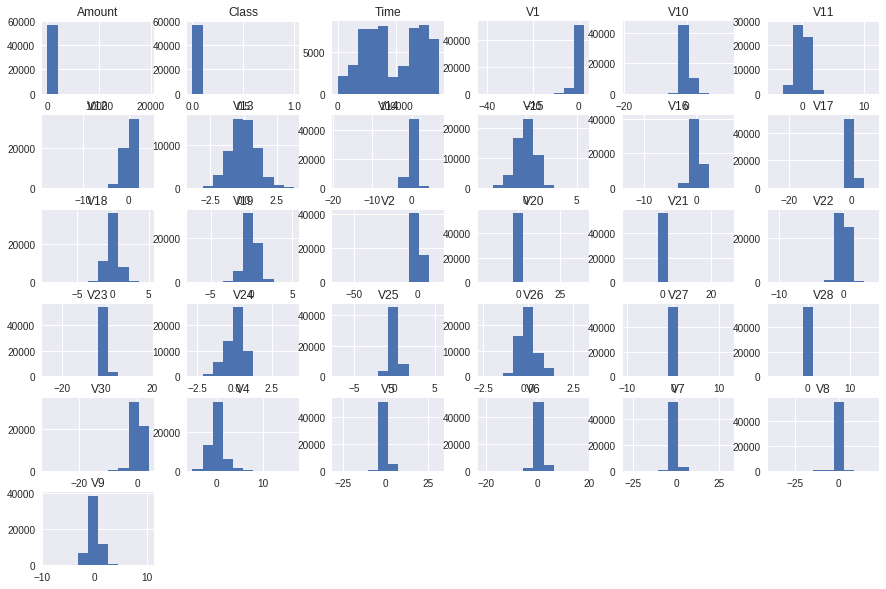

In [14]:
sample_data.hist()
plt.show()

#Fraud and valid cases


In [15]:
fraud = sample_data[sample_data['Class']==1]
valid = sample_data[sample_data['Class']==0]
print("Fraud cases: {} & valid Cases: {}".format(len(fraud),len(valid)))

Fraud cases: 93 & valid Cases: 56868


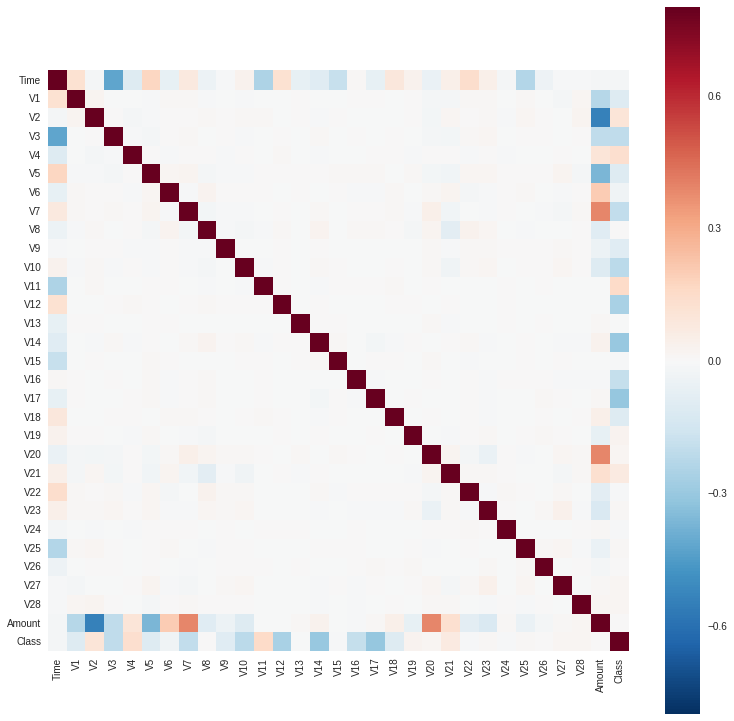

In [16]:
f,ax = plt.subplots(figsize= (13,13))
import seaborn as sns
#plt.figure(figsize= (30.20))
coerced = sample_data.corr()
sns.heatmap(coerced,vmax = 0.8,ax= ax, square = True)

In [0]:
X = dataset.iloc[:,:30]
Y = dataset['Class']

In [18]:
X.shape

(284807, 30)

In [19]:
Y.shape

(284807,)

In [20]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

## Algorithms for anomaly detection 
## #1. Isolation Forest
## # 2. LocalOutlierFactor

In [0]:
from sklearn.metrics import accuracy_score , classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [0]:
outlier_factor = len(fraud)/float(len(valid))

In [23]:
print(outlier_factor)

0.0016353661109938806


In [0]:
Classifier = {
    'isolation_forest': IsolationForest(max_samples = len(X), contamination = outlier_factor, random_state = 1),
    'local_outlier_factor': LocalOutlierFactor(n_neighbors = 25, contamination = outlier_factor)
}

In [25]:
Classifier.items()

dict_items([('isolation_forest', IsolationForest(behaviour='old', bootstrap=False,
        contamination=0.0016353661109938806, max_features=1.0,
        max_samples=284807, n_estimators=100, n_jobs=None, random_state=1,
        verbose=0)), ('local_outlier_factor', LocalOutlierFactor(algorithm='auto', contamination=0.0016353661109938806,
          leaf_size=30, metric='minkowski', metric_params=None,
          n_jobs=None, n_neighbors=25, novelty=False, p=2))])

In [27]:
for i, (clf_name,clf) in enumerate(Classifier.items()):
  if clf_name =='isolation_forest':
    clf.fit(X)
    temp = clf.decision_function(X)
    y_pred = clf.predict(X)
    
  else:
    y_pred = clf.fit_predict(X)
  
  # 1 for fraud and 0 for valid
  y_pred[y_pred==1]= 0
  y_pred[y_pred==-1]=1
  
  print()
  print('classifier name {}  and errors: {}'.format(clf_name, (y_pred!= Y).sum()))
  print(accuracy_score(Y, y_pred))
  print(classification_report(Y, y_pred))
  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)



classifier name isolation_forest  and errors: 628
0.9977949980162004
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.35      0.34      0.34       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.68      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807


classifier name local_outlier_factor  and errors: 914
0.9967908092146611
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.04      0.05       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

